# Weather and Flu Data per State week 40 2010 to week 49 2019

Import libaries

In [1]:
# import pandas and numpy for data manipulation and exploratory data analysis (set up for complete view on data)
import pandas as pd
import numpy as np

# importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing scipy for hypothesis testing
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

Reading cvs files

In [2]:
data_weather = pd.read_csv('data/weather_week.csv')

In [3]:
data_flu = pd.read_csv('data/flu_week.csv')

Rename columns

In [4]:
key_columns = ['STATE','WEEK', 'YEAR']
flu_weather = pd.merge(data_weather, data_flu, on=key_columns)

In [5]:
flu_weather.head(2)

,NAME,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,STATE,WEEK,YEAR,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,"ALBUQUERQUE INTERNATIONAL AIRPORT, NM US",2010-10-10,6.967143,0.001429,0.0,0.0,76.571429,54.142857,New Mexico,40,2010,2.13191,160,23,7505
1,"ALBUQUERQUE INTERNATIONAL AIRPORT, NM US",2010-10-17,5.208571,0.000000,0.0,0.0,74.857143,49.428571,New Mexico,41,2010,1.9635,142,22,7232


In [6]:
flu_weather.columns

Index(['NAME', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'STATE',
       'WEEK', 'YEAR', '%UNWEIGHTED ILI', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS'],
      dtype='object')

Sorting columns

In [7]:
flu_weather = flu_weather[['DATE', 'YEAR', 'WEEK', 'STATE', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', '%UNWEIGHTED ILI', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS']]

In [8]:
flu_weather = flu_weather.rename(columns = {'NAME': 'STATION'})

Convert data object to type datetime

In [9]:
flu_weather['DATE'] =  pd.to_datetime(flu_weather['DATE'])

In [10]:
flu_weather['DATE'].min(), flu_weather['DATE'].max()

(Timestamp('2010-10-10 00:00:00'), Timestamp('2019-12-01 00:00:00'))

In [11]:
flu_weather = flu_weather.set_index('DATE')
flu_weather.index # now its a time dataframe

DatetimeIndex(['2010-10-10', '2010-10-17', '2010-10-24', '2010-10-31',
               '2010-11-07', '2010-11-14', '2010-11-21', '2010-11-28',
               '2010-12-05', '2010-12-12',
               ...
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01'],
              dtype='datetime64[ns]', name='DATE', length=23757, freq=None)

In [12]:
flu_weather.tail(2)

,YEAR,WEEK,STATE,STATION,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
DATE,,,,,,,,,,,,,,
2019-11-24,2019,48,Delaware,"WILMINGTON NEW CASTLE CO AIRPORT, DE US",7.120,0.141429,0.0,0.0,51.571429,35.857143,0.632911,6,6,948
2019-12-01,2019,49,Delaware,"WILMINGTON NEW CASTLE CO AIRPORT, DE US",7.155,0.081429,0.0,0.0,52.428571,33.285714,0.369004,5,6,1355


In [13]:
flu_weather.shape

(23757, 14)

In [14]:
flu_weather.dtypes

YEAR                   int64
WEEK                   int64
STATE                 object
STATION               object
AWND                 float64
PRCP                 float64
SNOW                 float64
SNWD                 float64
TMAX                 float64
TMIN                 float64
%UNWEIGHTED ILI       object
ILITOTAL              object
NUM. OF PROVIDERS     object
TOTAL PATIENTS        object
dtype: object

Convert data to numeric

In [15]:
flu_weather['%UNWEIGHTED ILI'] = flu_weather['%UNWEIGHTED ILI'].apply(pd.to_numeric, errors='coerce')

In [16]:
flu_weather['ILITOTAL'] = flu_weather['ILITOTAL'].apply(pd.to_numeric, errors='coerce')

In [17]:
flu_weather['NUM. OF PROVIDERS'] = flu_weather['NUM. OF PROVIDERS'].apply(pd.to_numeric, errors='coerce')

In [18]:
flu_weather['TOTAL PATIENTS'] = flu_weather['TOTAL PATIENTS'].apply(pd.to_numeric, errors='coerce')

In [19]:
# flu_weather.dtypes

Missing values

In [20]:
missing_values = flu_weather.isnull().sum()
missing_values

YEAR                    0
WEEK                    0
STATE                   0
STATION                 0
AWND                  440
PRCP                    2
SNOW                 6132
SNWD                 6769
TMAX                  440
TMIN                  442
%UNWEIGHTED ILI       478
ILITOTAL              478
NUM. OF PROVIDERS     478
TOTAL PATIENTS        478
dtype: int64

In [21]:
flu_weather['no_SNOW'] = flu_weather['SNOW'].isnull()

In [22]:
flu_weather_sub = flu_weather[(flu_weather['no_SNOW'])]

In [23]:
flu_weather_sub.describe()

,YEAR,WEEK,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,6132.000000,6132.000000,6131.000000,6130.000000,0.0,46.0,6131.000000,6131.000000,5763.000000,5763.000000,5763.000000,5763.000000
mean,2014.491357,26.846869,7.699820,0.100668,NaN,0.0,67.294711,48.319424,1.645376,322.376193,40.043901,16363.220718
std,2.620651,15.203482,2.737217,0.148292,NaN,0.0,18.357483,18.772755,1.683044,471.652865,31.368934,15443.966904
min,2010.000000,1.000000,1.245714,0.000000,NaN,0.0,6.428571,-14.428571,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,14.000000,5.719286,0.004286,NaN,0.0,53.500000,33.714286,0.525071,24.000000,17.000000,3606.500000
50%,2015.000000,27.000000,7.447143,0.045714,NaN,0.0,70.857143,50.142857,1.181210,126.000000,29.000000,11335.000000
75%,2017.000000,40.250000,9.362857,0.137143,NaN,0.0,82.285714,64.285714,2.208075,430.000000,55.000000,25650.500000
max,2019.000000,52.000000,27.032857,1.644286,NaN,0.0,109.285714,85.714286,16.144500,6583.000000,194.000000,87795.000000


In [24]:
flu_weather['SNOW'] = flu_weather['SNOW'].fillna(0)
flu_weather['SNWD'] = flu_weather['SNWD'].fillna(0)
flu_weather['PRCP'] = flu_weather['PRCP'].fillna(0)

In [25]:
flu_weather = flu_weather.dropna()

In [26]:
flu_weather.drop(columns=['no_SNOW'], inplace = True)

In [27]:
flu_weather.shape

(22836, 14)

# Analysing  Time Series



A time series refers to observations of a single variable over a specified time horizon. Variable here is ILITOTAL, the amount of infected people

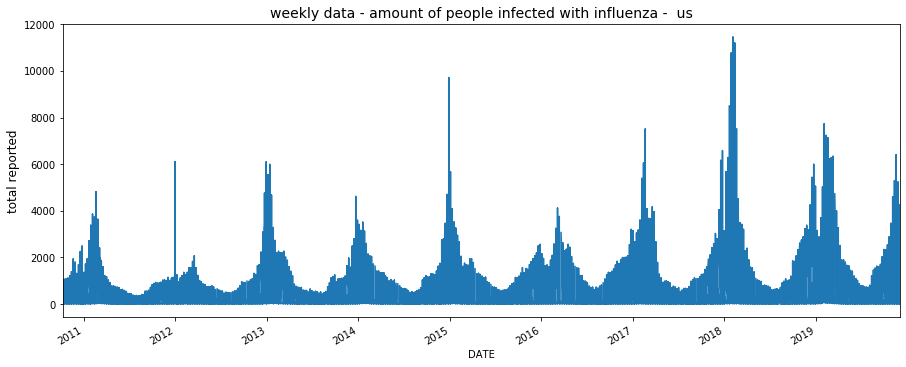

In [28]:
plt.title('weekly data - amount of people infected with influenza -  us', fontsize=14)
plt.ylabel('total reported', fontsize=12)
flu_weather['ILITOTAL'].plot(figsize=(15, 6))

In [29]:
#flu_weather.to_csv('data/flu_weather.csv', index=False)

# Alaska Seasonality Study

In [30]:
alaska = flu_weather[(flu_weather['STATE']== 'Alaska')]

In [31]:
yalaska = alaska['ILITOTAL']

In [32]:
yalaska

DATE
2010-10-10     15.0
2010-10-17     19.0
2010-10-24     11.0
2010-10-31     18.0
2010-11-07     13.0
              ...  
2019-11-03    115.0
2019-11-10    115.0
2019-11-17     97.0
2019-11-24    103.0
2019-12-01    106.0
Name: ILITOTAL, Length: 478, dtype: float64

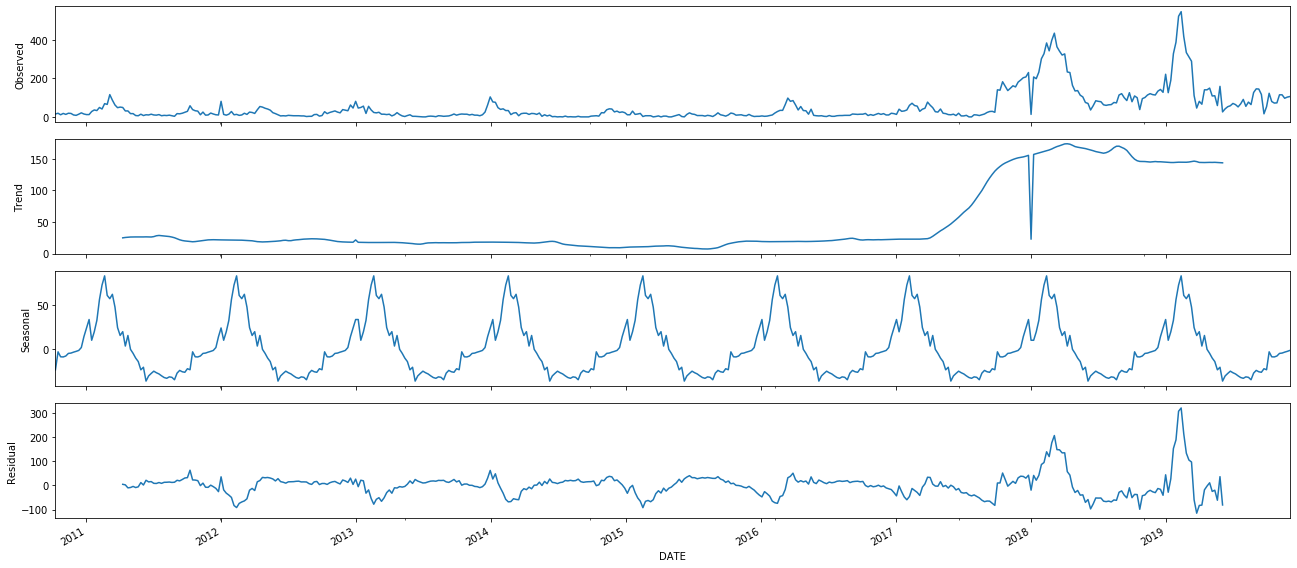

In [33]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(yalaska, model='additive', freq=52)
fig = decomposition.plot()
plt.show()

# Decomposition - Alaska

In [34]:
trend = decomposition.trend.dropna()

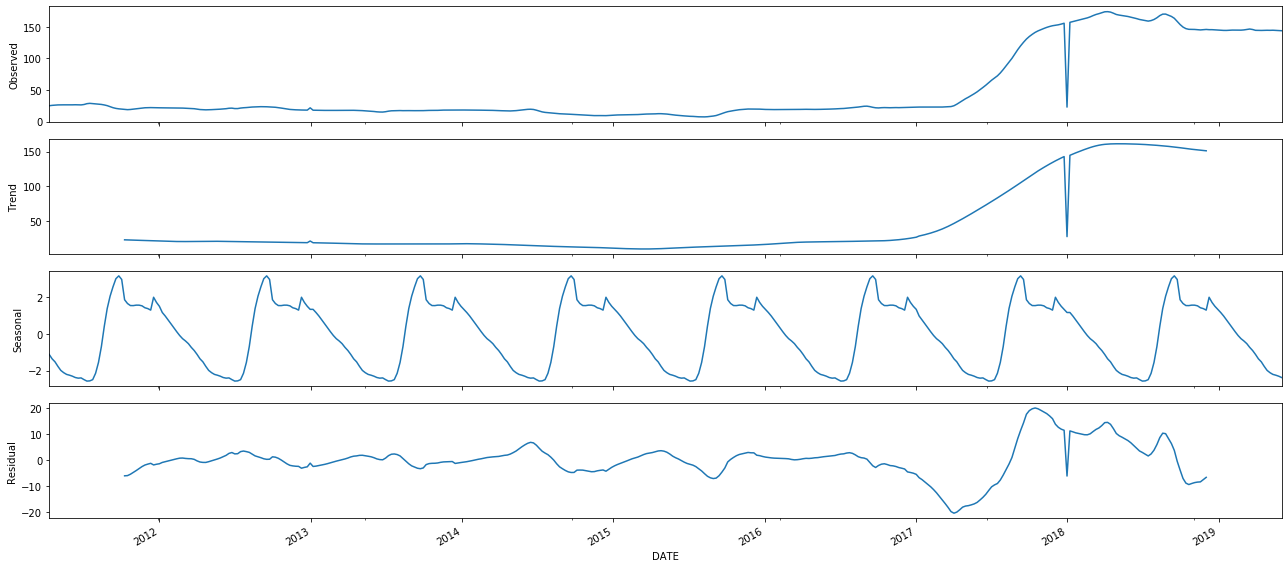

In [35]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(trend, model='additive', freq=52)
fig = decomposition.plot()
plt.show()

# California Seasonality Study

In [36]:
california = flu_weather[(flu_weather['STATE']== 'California')]

In [37]:
ycali = california['ILITOTAL']

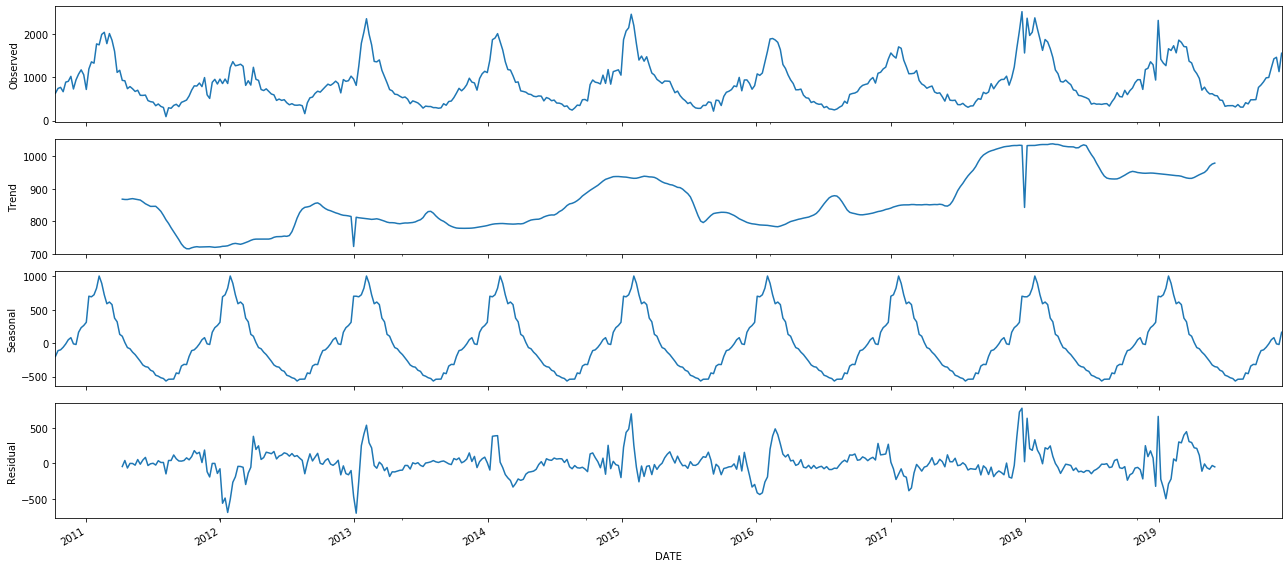

In [38]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ycali, model='additive', freq=52) # could also be multipliation
fig = decomposition.plot()
plt.show()

# Decomposition - California

In [39]:
trend = decomposition.trend.dropna()

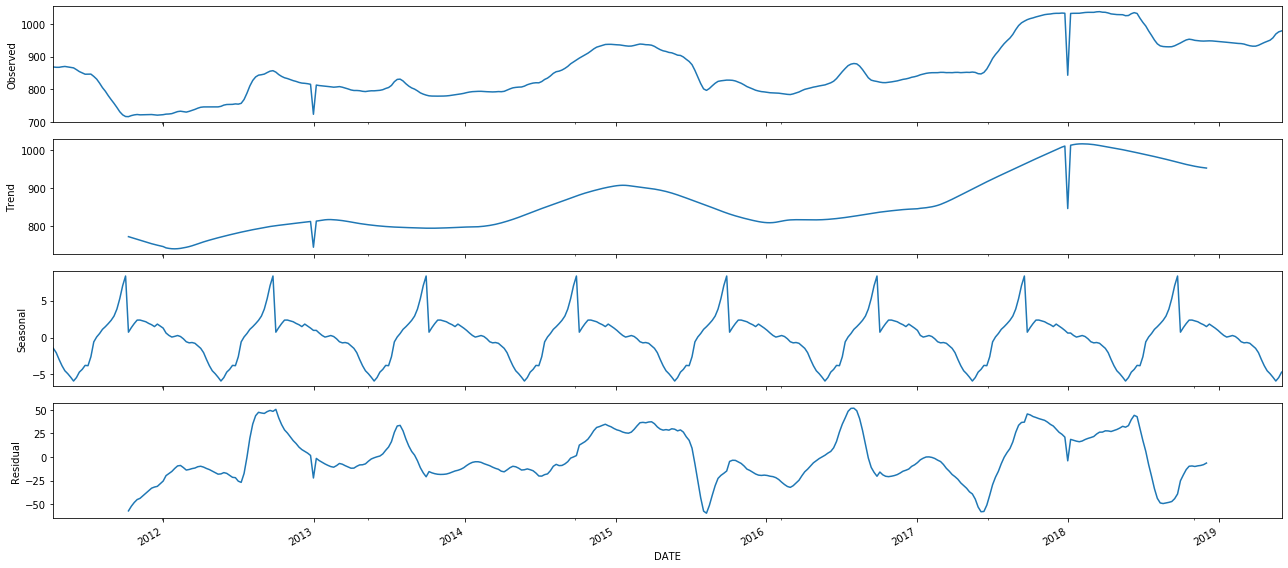

In [40]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(trend, model='additive', freq=52)
fig = decomposition.plot()
plt.show()

# New York Seasonality Study

In [41]:
new_york = flu_weather[(flu_weather['STATE']== 'New York')]

In [42]:
yny = new_york['ILITOTAL']

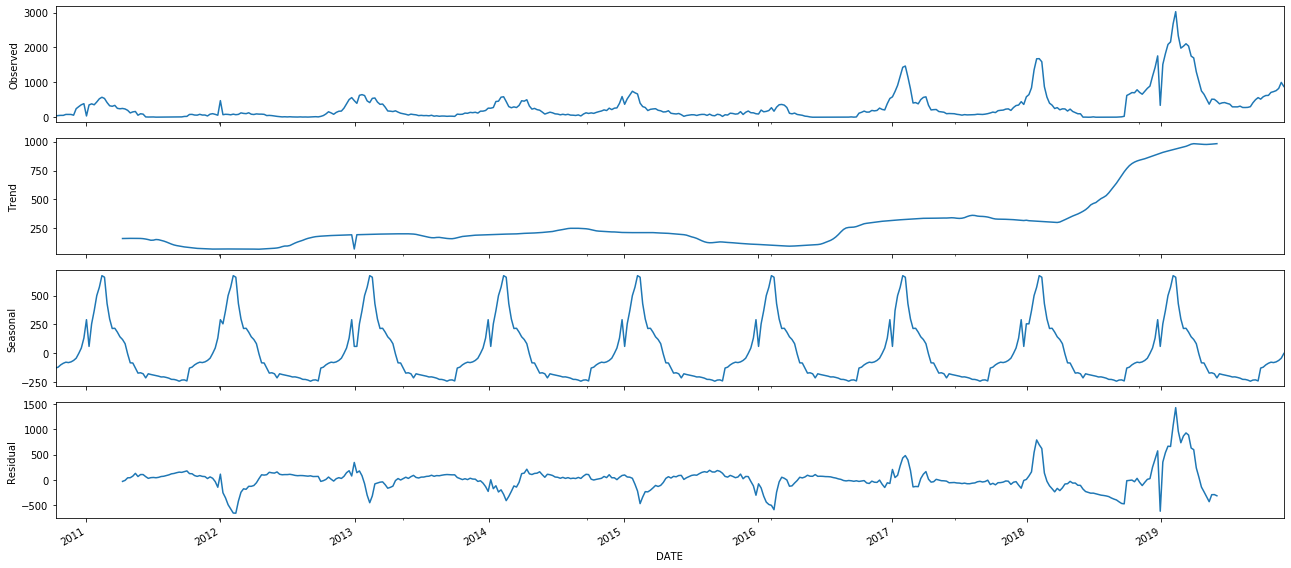

In [43]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(yny, model='additive', freq=52) # could also be multipliation
fig = decomposition.plot()
plt.show()

# Decomposition - NY

In [44]:
trend = decomposition.trend.dropna()

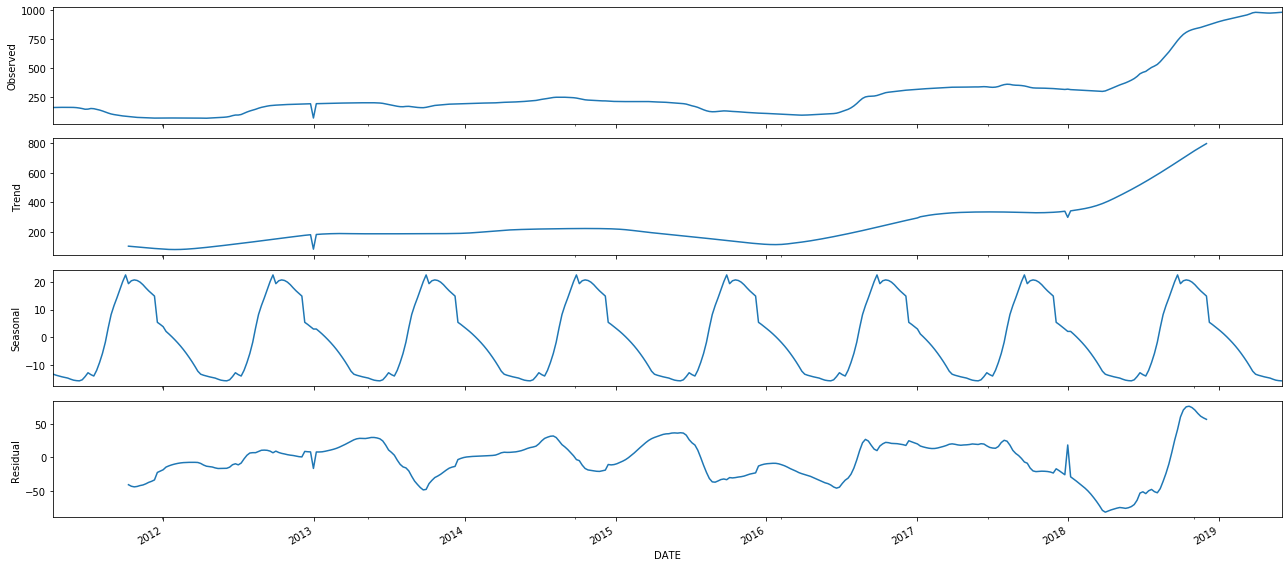

In [45]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(trend, model='additive', freq=52)
fig = decomposition.plot()
plt.show()

# Seasonality Study US

In [46]:
y = flu_weather['ILITOTAL'].resample('W').mean()

In [47]:
y

DATE
2010-10-10    146.937500
2010-10-17    160.354167
2010-10-24    169.208333
2010-10-31    172.541667
2010-11-07    192.041667
                 ...    
2019-11-03    646.375000
2019-11-10    708.229167
2019-11-17    829.291667
2019-11-24    821.770833
2019-12-01    808.255319
Freq: W-SUN, Name: ILITOTAL, Length: 478, dtype: float64

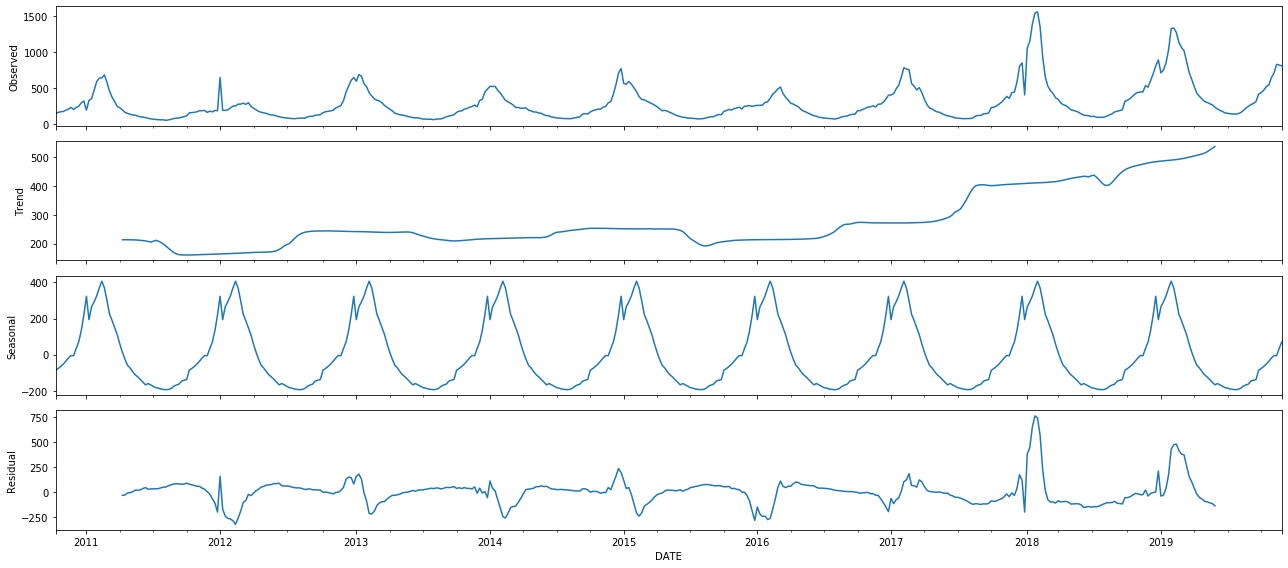

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive') # could also be multipliation
fig = decomposition.plot()
plt.show()

# Decomposition - US

In [49]:
trend = decomposition.trend.dropna()

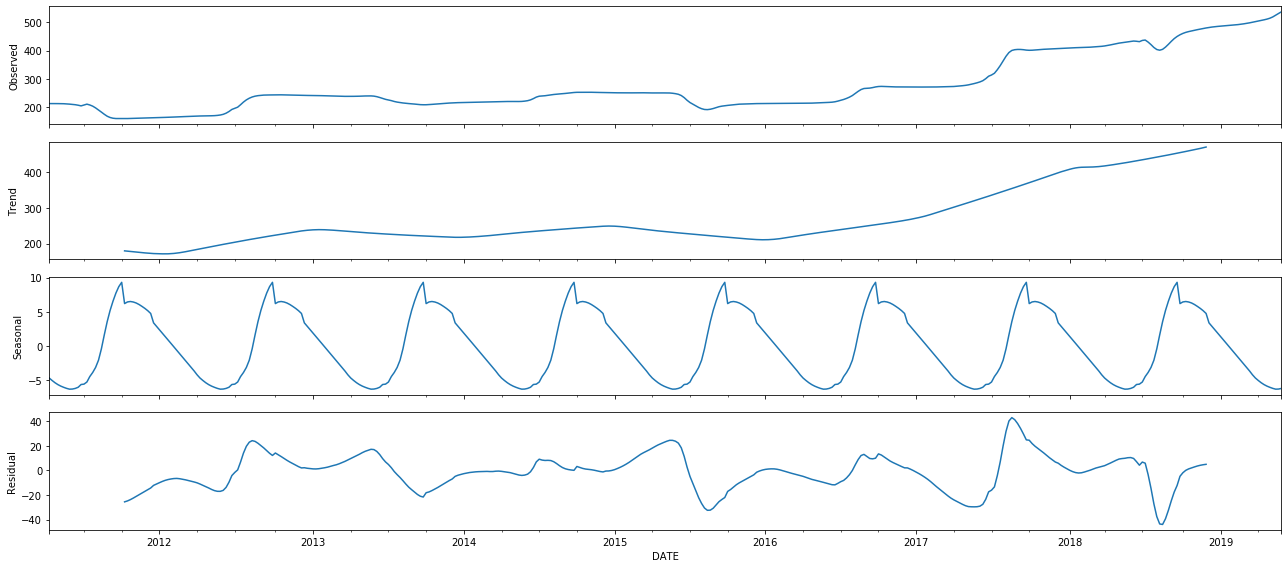

In [50]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(trend, model='additive', freq=52)
fig = decomposition.plot()
plt.show()

# Autocorrelation Plot


An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.

In [51]:
flu_weather1 = flu_weather.resample('W').mean()
flu_weather2 = flu_weather1['ILITOTAL']

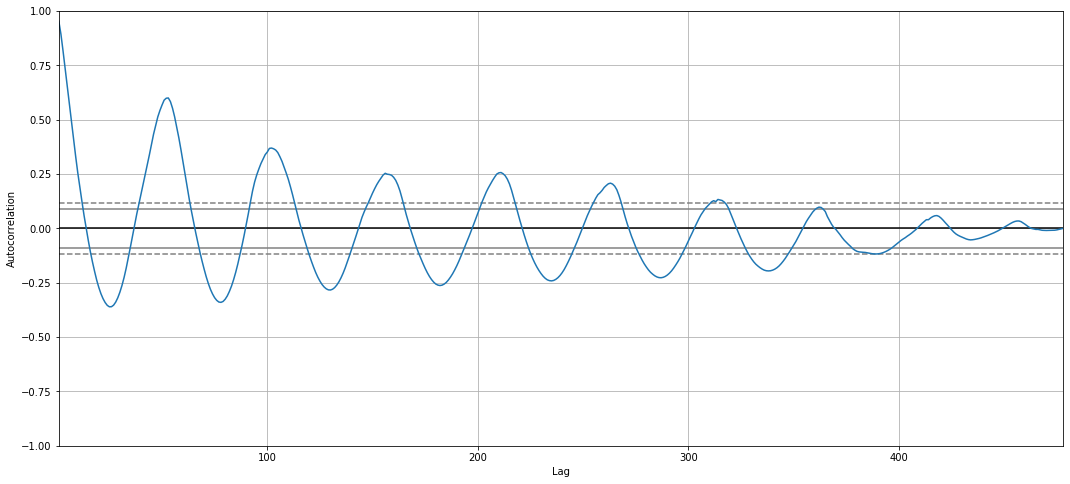

In [52]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(flu_weather2) # Autocorrelation plots are often used for checking randomness in time series. https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-autocorrelation
plt.show()

# Autocorrelation with lag zero always equal 1, because this represents the autocorrelation between each term and itself. Value and value with lag zero will always will be the same.
# between -0.05 and 0.05 is good -> there is no correlation to itself with any lag, we can reject H0 which would be that there is a correlation 
# here: plot indicates that ILITOTALs are not highly correlated
# the "amount of people" does not show any particular pattern — they tend to fluctuate randomly around zero. 
# This means that the "amount of people" are largely independent of each other.

You can use an autocorrelation plot to determine whether the elements of a time series are random (that is, unrelated to each other). This is important, because many statistical tests involving time series are based on this assumption.

# ARIMA Model

In [53]:
from pmdarima.arima import ARIMA
import pmdarima as pm

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [54]:
# finding the best order for the ARIMA model
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(flu_weather2, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5348.465, BIC=5369.175, Fit time=1.454 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5636.711, BIC=5644.995, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5511.121, BIC=5527.690, Fit time=1.069 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5338.837, BIC=5355.405, Fit time=0.908 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5340.667, BIC=5361.377, Fit time=1.348 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5628.178, BIC=5640.604, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5340.631, BIC=5361.341, Fit time=3.483 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5342.796, BIC=5367.648, Fit time=5.999 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=5344.466, BIC=5356.892, Fit time=0.906 seconds
Fit ARIMA: order=(0, 1, 2) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  478
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -2655.138
Date:                            Thu, 26 Mar 2020   AIC                           5322.275
Time:                                    13:30:29   BIC                           5347.127
Sample:                                         0   HQIC                          5332.057
                                            - 478                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0760      0.317      0.240      0.811      -0.546       0.698
ar.L1          0.3623      0.161      2.250      0.024       0.047       0.678
ma.L1         -0.2477      0.152     -1.631      0.103      -0.545       0.050
ma.L2          0.1678      0.036      4.670      0.000       0.097       0.238
ma.S.L12      -0.9988      1.140     -0.876      0.381      -3.233       1.235
sigma2      4858.1758   5473.832      0.888      0.375   -5870.338    1.56e+04
===================================================================================
Ljung-Box (Q):                       21.56   Jarque-Bera (JB):             19356.52
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.33   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                             ARIMA Model Results                              
Dep. Variable:             D.ILITOTAL   No. Observations:                  477
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2703.260
Method:                       css-mle   S.D. of innovations             69.977
Date:                Thu, 26 Mar 2020   AIC                           5416.520
Time:                        13:30:30   BIC                           5437.357
Sample:                    10-17-2010   HQIC                          5424.713
                         - 12-01-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3707      4.549      0.301      0.763      -7.545      10.286
ar.L1.D.ILITOTAL     0.3376      0.174      1.936      0.053      -0.004       0.679
ma.L1.D.ILITOTAL    -0.2331 

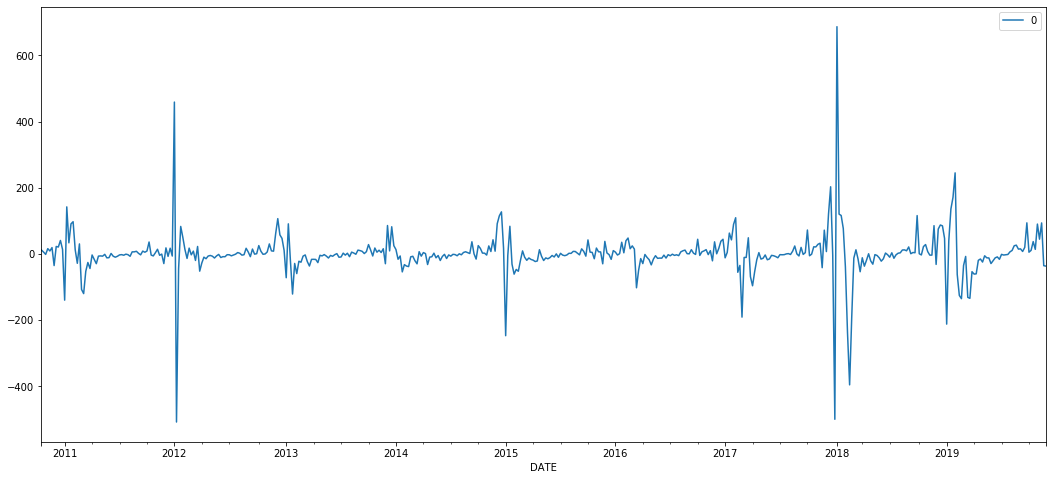

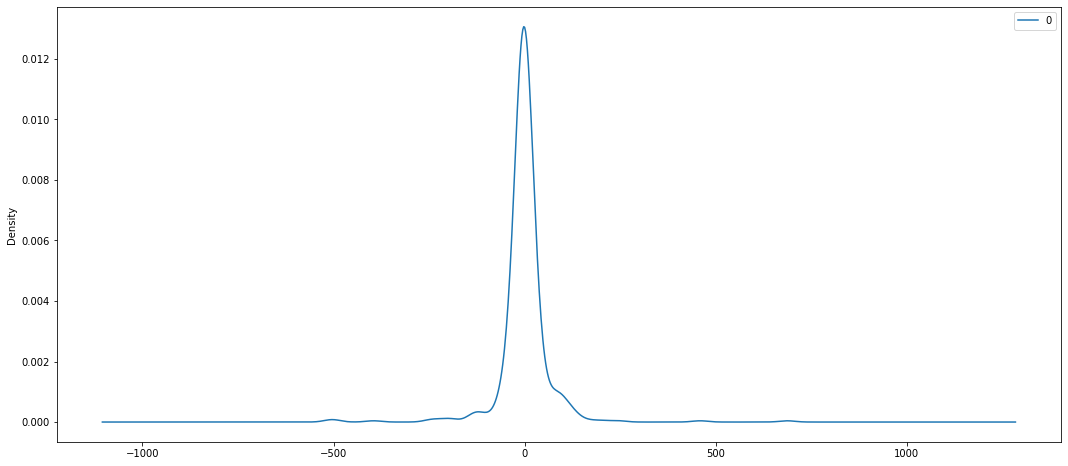

                0
count  477.000000
mean    -0.009610
std     70.050573
min   -507.670260
25%    -11.940746
50%     -1.853530
75%     10.719535
max    686.851504


In [55]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(flu_weather2, order=(1,1,2))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

#### In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time.

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum 

Test MSE: 14030.841


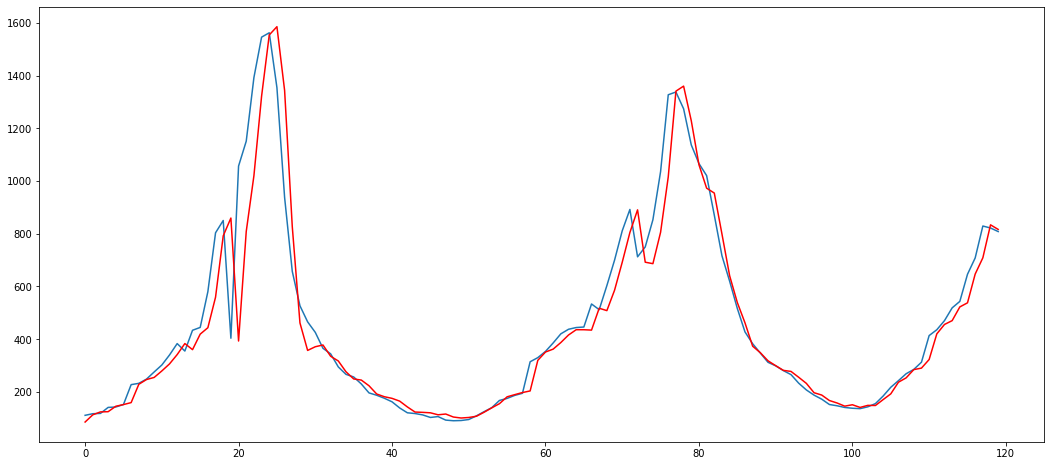

In [56]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# Create Training and Test
X = flu_weather2.values
size = int(len(X) * 0.75)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()  

# SARIMA

In [57]:
#flu_weather2

In [58]:
y = flu_weather['ILITOTAL'].resample('W').mean()  # all states
y

DATE
2010-10-10    146.937500
2010-10-17    160.354167
2010-10-24    169.208333
2010-10-31    172.541667
2010-11-07    192.041667
                 ...    
2019-11-03    646.375000
2019-11-10    708.229167
2019-11-17    829.291667
2019-11-24    821.770833
2019-12-01    808.255319
Freq: W-SUN, Name: ILITOTAL, Length: 478, dtype: float64

In [59]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=( 1, 1, 2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3577      0.143      2.508      0.012       0.078       0.637
ma.L1         -0.2485      0.129     -1.922      0.055      -0.502       0.005
ma.L2          0.1662      0.036      4.645      0.000       0.096       0.236
ma.S.L12      -1.0000      0.023    -44.138      0.000      -1.044      -0.956
sigma2      4892.3836   4.63e-06   1.06e+09      0.000    4892.384    4892.384


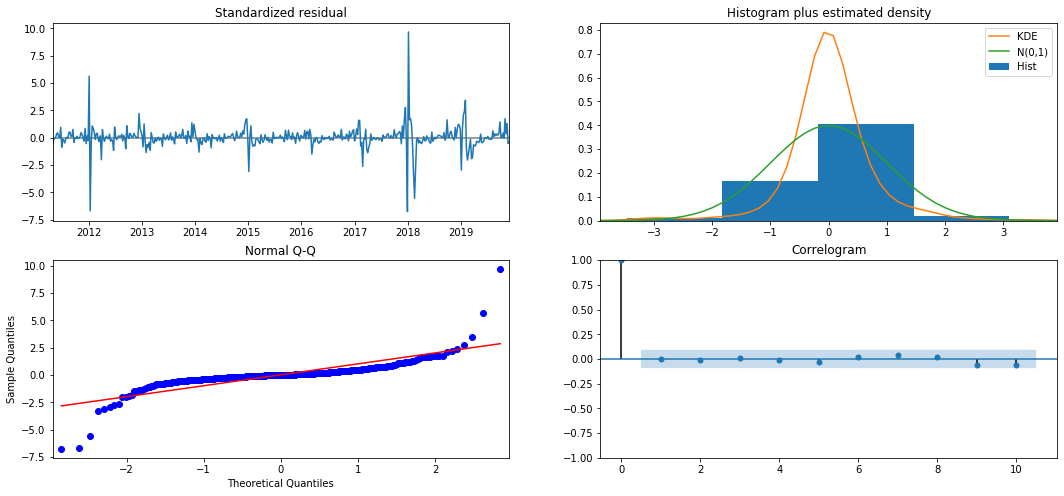

In [60]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [61]:
#y['2015':]

In [62]:
#y['2019':]

In [63]:
pd.plotting.register_matplotlib_converters()

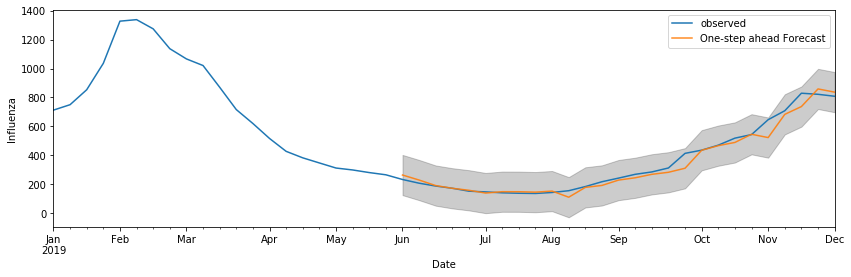

<Figure size 1296x576 with 0 Axes>

In [64]:
pred = results.get_prediction(start=pd.to_datetime('2019-06-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Influenza')
plt.legend()
plt.show()
plt.savefig('forecast2.png')

In [65]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-06-02':]  #
mse = ((y_forecasted - y_truth) ** 2).mean()
mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))
corr = np.corrcoef(y_forecasted, y_truth)[0,1] 
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
print('The MAPE is {}'.format(round((mape), 2)))
print('The Correlationscoefficient is {}'.format(round((corr), 2)))

The Mean Squared Error is 1649.33
The Root Mean Squared Error is 40.61
The MAPE is 0.08
The Correlationscoefficient is 0.99


Obs: In both MSE and RMSE, values closer to zero are better. They are a measure of accuracy.

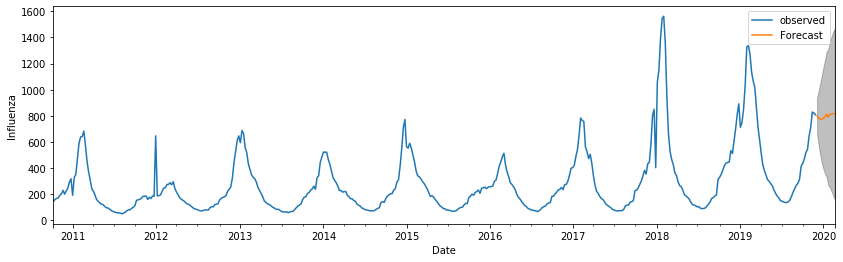

In [66]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Influenza')
plt.legend()
plt.show()

In [67]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

DATE
2019-06-02    264.163362
2019-06-09    229.429306
2019-06-16    191.233542
2019-06-23    172.440461
2019-06-30    158.656970
2019-07-07    139.554161
2019-07-14    149.009846
2019-07-21    148.788180
2019-07-28    145.843712
2019-08-04    153.181235
2019-08-11    110.869509
2019-08-18    178.763613
Freq: W-SUN, dtype: float64

In [68]:
y_truth.head(12)

DATE
2019-06-02    233.291667
2019-06-09    207.625000
2019-06-16    188.000000
2019-06-23    172.666667
2019-06-30    152.416667
2019-07-07    147.625000
2019-07-14    141.229167
2019-07-21    138.208333
2019-07-28    136.729167
2019-08-04    143.604167
2019-08-11    155.787234
2019-08-18    184.382979
Freq: W-SUN, Name: ILITOTAL, dtype: float64

In [69]:
pred_ci.head(24)

,lower ILITOTAL,upper ILITOTAL
2019-12-08,660.019796,937.694346
2019-12-15,576.082570,990.753407
2019-12-22,497.253085,1049.663349
2019-12-29,438.472934,1112.013370
2020-01-05,392.960221,1172.594701
2020-01-12,356.335875,1230.417064
2020-01-19,333.362748,1293.003076
2020-01-26,269.460604,1307.752775
2020-02-02,255.139208,1366.571001
2020-02-09,223.884076,1403.944407


In [70]:
forecast = round(pred_uc.predicted_mean,2)
forecast.head(12)

2019-12-08    798.86
2019-12-15    783.42
2019-12-22    773.46
2019-12-29    775.24
2020-01-05    782.78
2020-01-12    793.38
2020-01-19    813.18
2020-01-26    788.61
2020-02-02    810.86
2020-02-09    813.91
2020-02-16    818.68
2020-02-23    813.34
Freq: W-SUN, dtype: float64

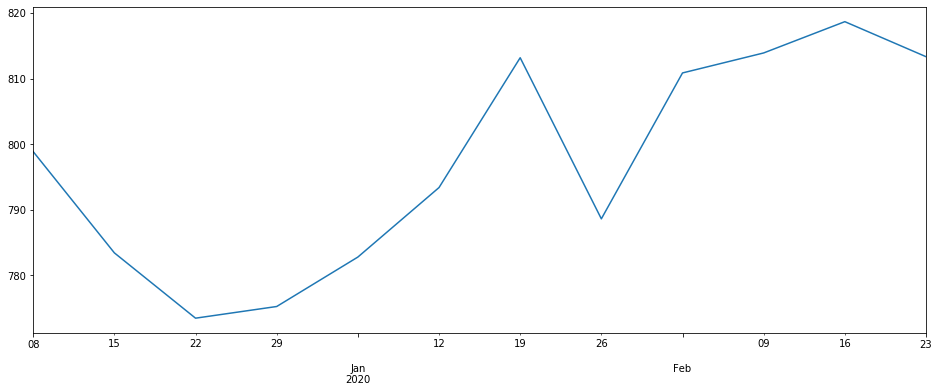

In [71]:
forecast.plot(figsize=(16, 6))
plt.savefig('forecast1.png')

# Times Series Forecasting Prophet - not relevant

In [72]:
y = flu_weather['ILITOTAL'].resample('W').mean()
y

DATE
2010-10-10    146.937500
2010-10-17    160.354167
2010-10-24    169.208333
2010-10-31    172.541667
2010-11-07    192.041667
                 ...    
2019-11-03    646.375000
2019-11-10    708.229167
2019-11-17    829.291667
2019-11-24    821.770833
2019-12-01    808.255319
Freq: W-SUN, Name: ILITOTAL, Length: 478, dtype: float64

In [73]:
y = y.reset_index()
test = y.rename(columns={'DATE': 'ds', 'ILITOTAL': 'y'})
test

,ds,y
0,2010-10-10,146.937500
1,2010-10-17,160.354167
2,2010-10-24,169.208333
3,2010-10-31,172.541667
4,2010-11-07,192.041667
...,...,...
473,2019-11-03,646.375000
474,2019-11-10,708.229167
475,2019-11-17,829.291667
476,2019-11-24,821.770833


In [74]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [75]:
#Fit a time series forecasting model
m = Prophet(weekly_seasonality=True)
m.add_seasonality(name='weekly', period=7, fourier_order=5)
m.fit(test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
#Get DataSet to Forecast
future = test.tail(52)
future = future.drop('y', axis=1)
#drop last 52 weeks of actuals 
test.drop(test.tail(52).index,inplace=True)

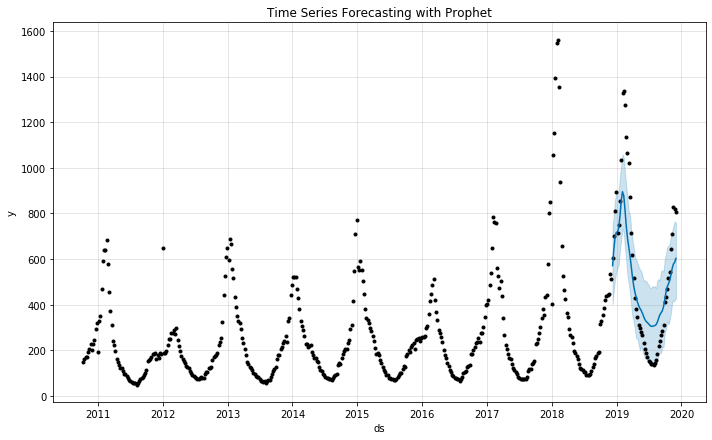

In [77]:
forecast = m.predict(future)
#Plot the Forecast
m.plot(forecast)
plt.title("Time Series Forecasting with Prophet")
plt.show()

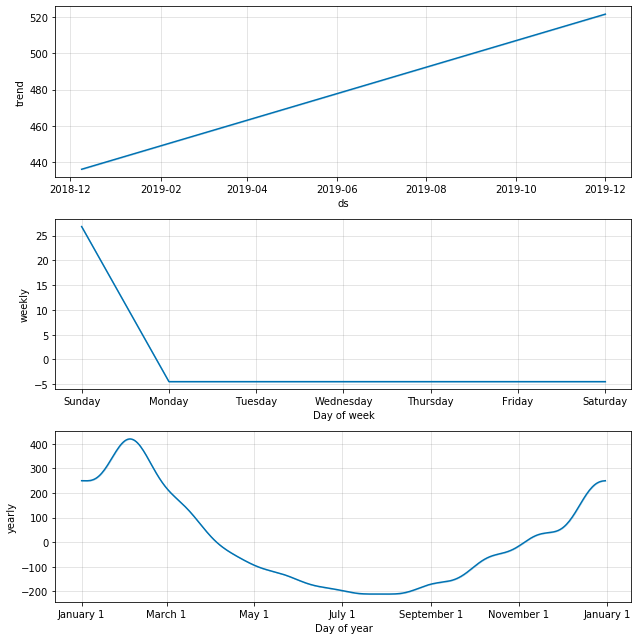

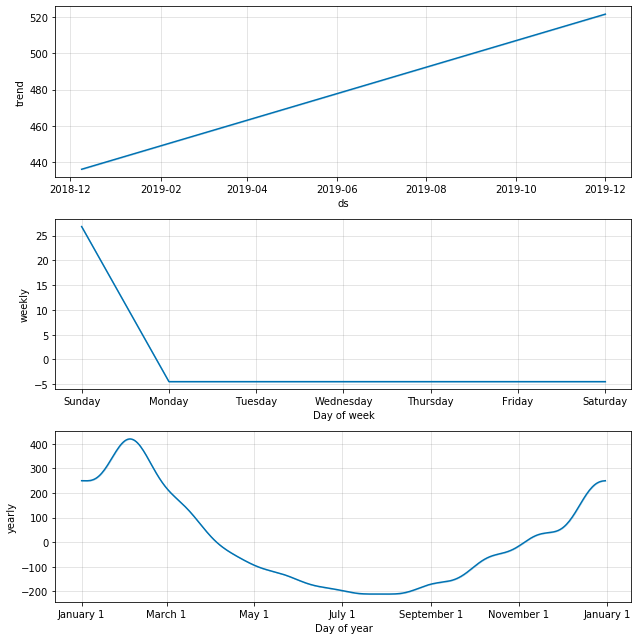

In [78]:
m.plot_components(forecast)

In [79]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Logistic Regression Modelling

In [80]:
flu_weather_reg = flu_weather.copy()

In [81]:
flu_weather_reg.tail(2)

,YEAR,WEEK,STATE,STATION,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
DATE,,,,,,,,,,,,,,
2019-11-24,2019,48,Delaware,"WILMINGTON NEW CASTLE CO AIRPORT, DE US",7.120,0.141429,0.0,0.0,51.571429,35.857143,0.632911,6.0,6.0,948.0
2019-12-01,2019,49,Delaware,"WILMINGTON NEW CASTLE CO AIRPORT, DE US",7.155,0.081429,0.0,0.0,52.428571,33.285714,0.369004,5.0,6.0,1355.0


In [82]:
flu_weather_reg['OUTBREAK'] = np.where(flu_weather_reg['%UNWEIGHTED ILI'] > 2.3, 1, 0)

In [83]:
flu_weather_reg.head(2)

,YEAR,WEEK,STATE,STATION,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,OUTBREAK
DATE,,,,,,,,,,,,,,,
2010-10-10,2010,40,New Mexico,"ALBUQUERQUE INTERNATIONAL AIRPORT, NM US",6.967143,0.001429,0.0,0.0,76.571429,54.142857,2.13191,160.0,23.0,7505.0,0
2010-10-17,2010,41,New Mexico,"ALBUQUERQUE INTERNATIONAL AIRPORT, NM US",5.208571,0.000000,0.0,0.0,74.857143,49.428571,1.96350,142.0,22.0,7232.0,0


### Correlation 

In [84]:
correlation = flu_weather_reg.corr()

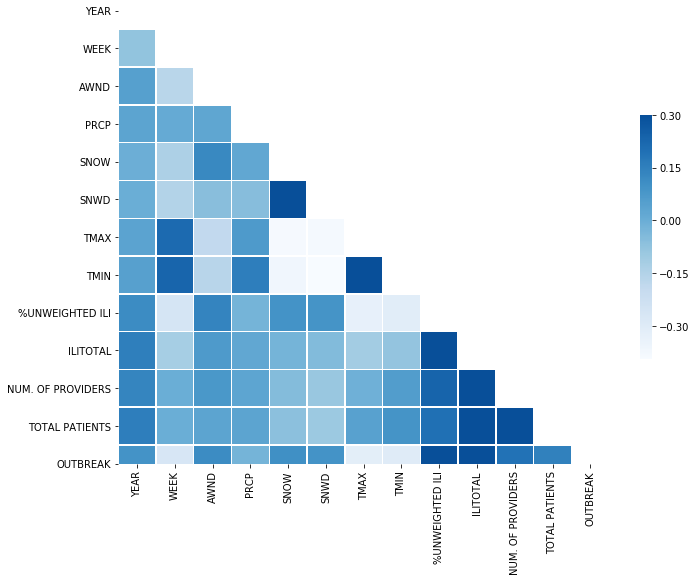

In [85]:
# correlation visualization
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap='Blues', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [86]:
flu_weather_reg.columns

Index(['YEAR', 'WEEK', 'STATE', 'STATION', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TMAX', 'TMIN', '%UNWEIGHTED ILI', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS', 'OUTBREAK'],
      dtype='object')

In [87]:
col = ['%UNWEIGHTED ILI', 'ILITOTAL', 'NUM. OF PROVIDERS','TOTAL PATIENTS', 'YEAR', 'STATION']
flu_weather_reg.drop(columns=col,inplace=True,axis=1)

In [88]:
flu_weather_reg

,WEEK,STATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,OUTBREAK
DATE,,,,,,,,,
2010-10-10,40,New Mexico,6.967143,0.001429,0.0,0.0,76.571429,54.142857,0
2010-10-17,41,New Mexico,5.208571,0.000000,0.0,0.0,74.857143,49.428571,0
2010-10-24,42,New Mexico,7.287143,0.024286,0.0,0.0,68.285714,47.857143,0
2010-10-31,43,New Mexico,8.084286,0.000000,0.0,0.0,65.714286,39.714286,1
2010-11-07,44,New Mexico,6.070000,0.000000,0.0,0.0,67.000000,42.142857,1
...,...,...,...,...,...,...,...,...,...
2019-11-03,45,Delaware,7.924286,0.161429,0.0,0.0,63.000000,44.571429,0
2019-11-10,46,Delaware,6.457143,0.011429,0.0,0.0,55.000000,32.571429,0
2019-11-17,47,Delaware,9.491429,0.012857,0.0,0.0,49.714286,27.857143,0


### get_dummies and undesampling 

In [89]:
flu_weather_dummy = pd.get_dummies(data=flu_weather_reg,drop_first=True)

In [90]:
#flu_weather_dummy.dtypes

In [91]:
#flu_weather_dummy_sample = flu_weather_dummy.sample(n=1000)

In [92]:
from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE

Using TensorFlow backend.


In [93]:
y = flu_weather_dummy['OUTBREAK']
X = flu_weather_dummy.drop(['OUTBREAK'], axis = 1)

In [94]:
# check for Balance
flu_weather_dummy.OUTBREAK.value_counts()

0    17645
1     5191
Name: OUTBREAK, dtype: int64

In [95]:
# Class to perform random under-sampling.
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5191, 1: 5191})


### logistic regression modeling 

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2) #, random_state=29)

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # initialize the model
lr.fit(X_train,y_train) # make the parameter fit into the model, "gives the cut off line"
acc = lr.score(X_test,y_test)*100                            

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

Logistic Regression Test Accuracy 81.46%


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
y_pred = lr.predict(X_test)

In [99]:
# test if model works -> choose random row (including all columns) -> we are trying to find out if there is an influenza outbreak or not
#print(lr.predict(new_row))
print(lr.predict(X_test[:20]))

[0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1]


In [100]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[811, 220],
       [165, 881]], dtype=int64)

The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 800 and 863 are actual predictions, and 203 and 211 are incorrect predictions.

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8146364949446316
Precision: 0.8001816530426885
Recall: 0.8422562141491395


Classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate the model is. In other words,  when a model makes a prediction, how often it is correct.

Recall: The Logistic Regression model can identify outbreaks it 80% of the time by given variables.

# Visualizing time series data

In [102]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [103]:
average_us = flu_weather.resample('W').mean()
average_us.head(2)

,YEAR,WEEK,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
DATE,,,,,,,,,,,,
2010-10-10,2010,40,6.549583,0.047827,0.003571,0.00000,72.660714,48.636905,0.928891,146.937500,34.812500,12845.979167
2010-10-17,2010,41,6.551845,0.064673,0.005952,0.02381,70.693452,46.550595,1.061985,160.354167,35.520833,12864.729167


In [104]:
pd.plotting.register_matplotlib_converters()

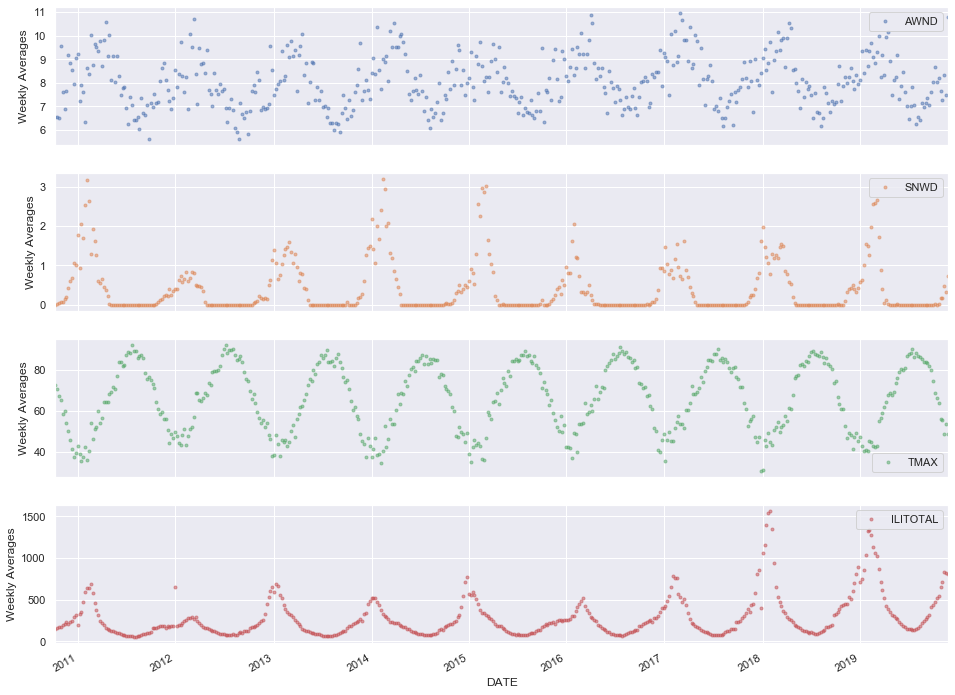

In [105]:
cols_plot = ['AWND', 'SNWD', 'TMAX','ILITOTAL'] # 'SNOW', 'PRCP', 'TMIN' 
axes = average_us[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 13), subplots=True)
for ax in axes:
    ax.set_ylabel('Weekly Averages')
    
plt.savefig('Average-plot.png')

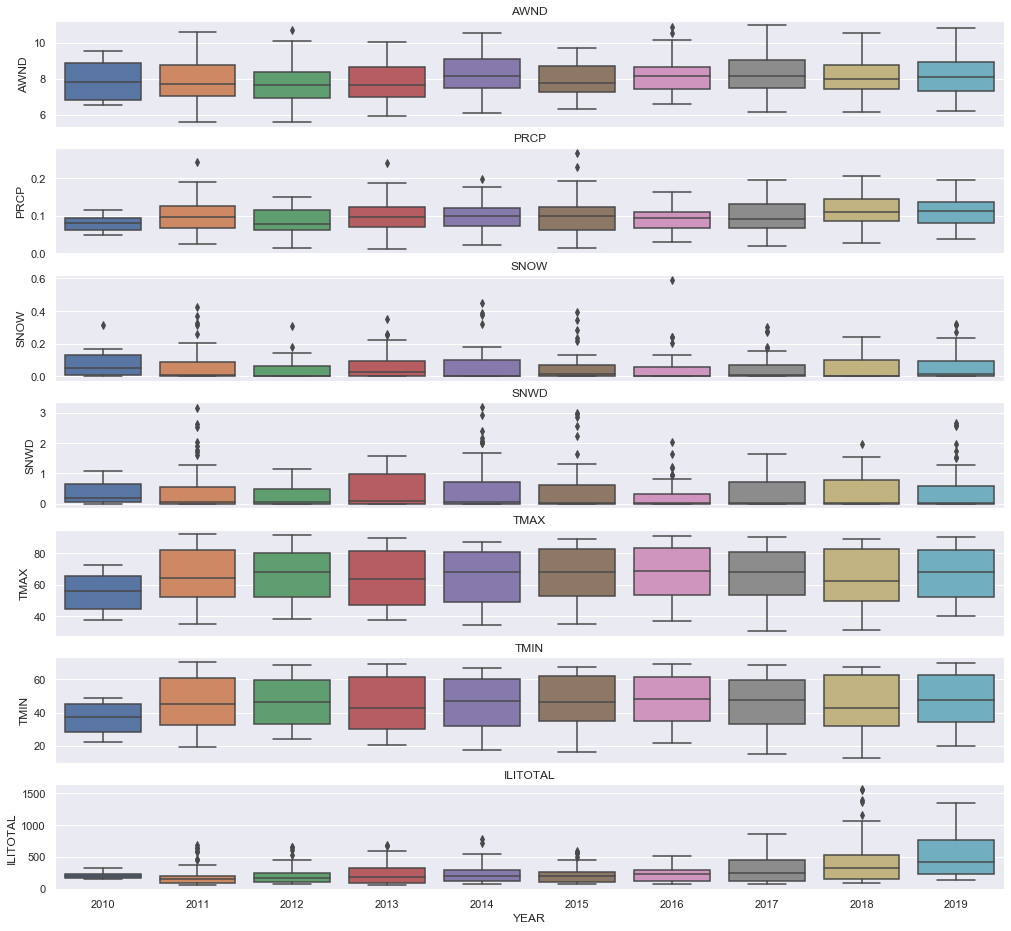

In [106]:
fig, axes = plt.subplots(7, 1, figsize=(17, 16), sharex=True)
for name, ax in zip(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'ILITOTAL'], axes):
    sns.boxplot(data=average_us, x='YEAR', y=name, ax=ax)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

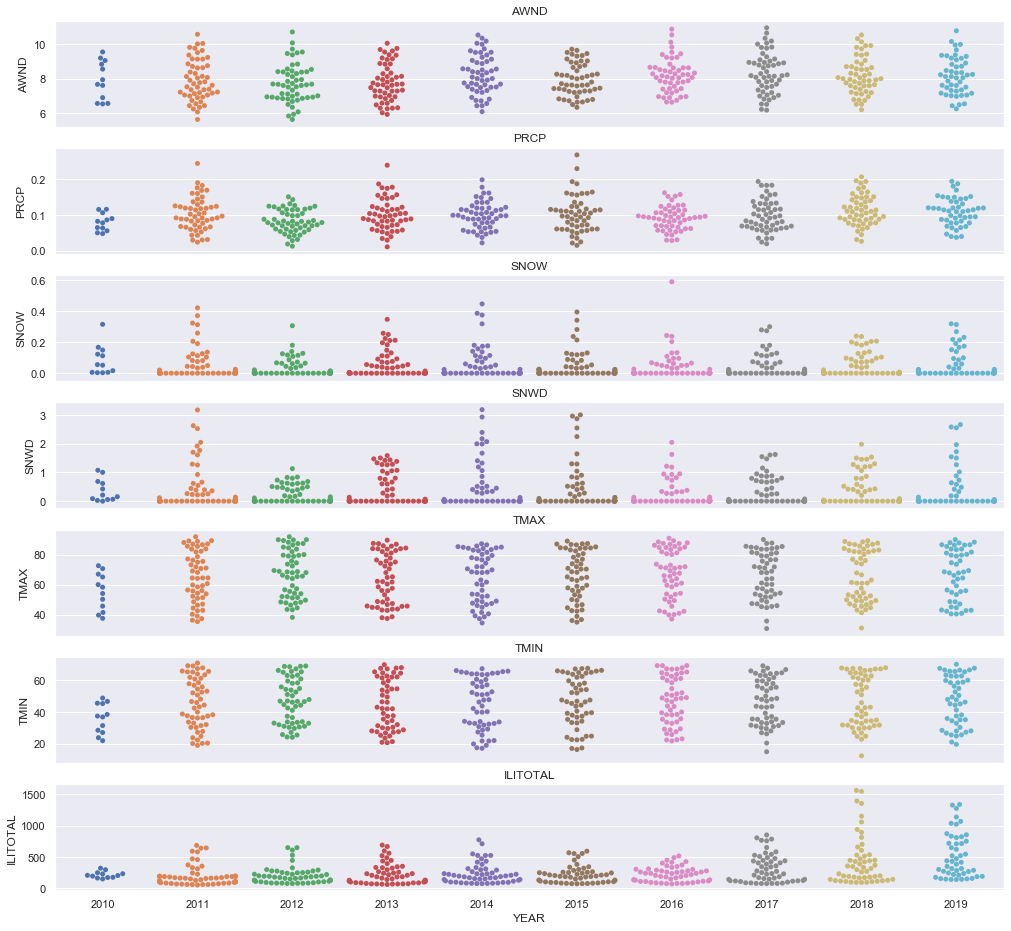

In [107]:
fig, axes = plt.subplots(7, 1, figsize=(17, 16), sharex=True)
for name, ax in zip(['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'ILITOTAL'], axes):
    sns.swarmplot(data=average_us, x='YEAR', y=name, ax=ax)
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

## Data Normalization

In [108]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [109]:
x = average_us.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=average_us.columns, index=average_us.index) # back to dataframe

df.tail(5)

,YEAR,WEEK,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
DATE,,,,,,,,,,,,
2019-11-03,1.0,0.862745,0.378010,0.424783,0.145665,0.058103,0.412396,0.429008,0.252526,0.394345,1.000000,0.976960
2019-11-10,1.0,0.882353,0.309922,0.112519,0.101310,0.056048,0.402691,0.378233,0.295042,0.435254,0.981725,0.944140
2019-11-17,1.0,0.901961,0.509233,0.112797,0.168347,0.152265,0.293855,0.274682,0.330850,0.515322,0.957167,0.994279
2019-11-24,1.0,0.921569,0.353069,0.390755,0.042339,0.103845,0.370367,0.402171,0.399697,0.510348,0.941176,0.794637
2019-12-01,1.0,0.941176,0.967778,0.419675,0.455045,0.229917,0.291314,0.349891,0.366133,0.501409,0.768290,0.861950


# Normalized Plots - Weather

In [110]:
# Normalized Data (see section above)
df1 = df[['AWND', 'TMAX', 'ILITOTAL','YEAR','PRCP', 'SNWD']].groupby([df.index.year]).mean() 

In [111]:
df1.tail(12)

,AWND,TMAX,ILITOTAL,YEAR,PRCP,SNWD
DATE,,,,,,
2010,0.429414,0.399998,0.108125,0.000000,0.267593,0.115133
2011,0.430758,0.567702,0.101529,0.111111,0.359641,0.155858
2012,0.394823,0.597957,0.102385,0.222222,0.278806,0.076261
2013,0.407661,0.549285,0.116620,0.333333,0.349467,0.145390
2014,0.491967,0.555383,0.124715,0.444444,0.342238,0.173967
2015,0.435667,0.578694,0.112129,0.555556,0.356108,0.156472
2016,0.482166,0.596246,0.114476,0.666667,0.310763,0.085915
2017,0.507039,0.581108,0.175640,0.777778,0.337875,0.114651
2018,0.477560,0.569932,0.258299,0.888889,0.397937,0.132220


In [112]:
pd.plotting.register_matplotlib_converters()

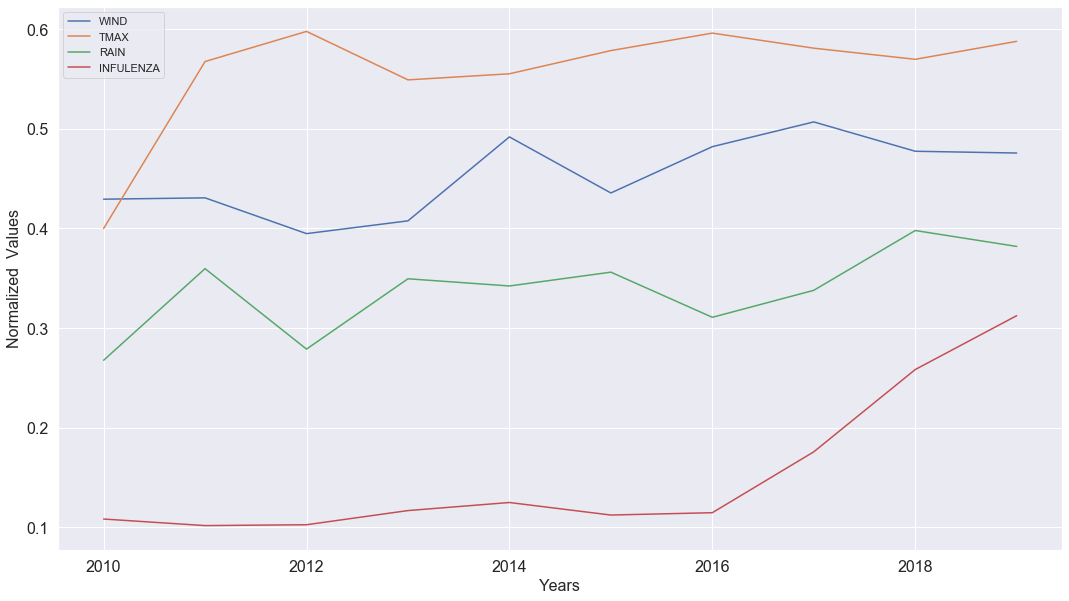

In [113]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(df1['AWND'], label='WIND')
ax.plot(df1['TMAX'], label='TMAX')
ax.plot(df1['PRCP'], label='RAIN')
ax.plot(df1['ILITOTAL'], label='INFULENZA')
ax.legend()
ax.set_ylabel('Normalized  Values', size=16)
ax.set_xlabel('Years',size=16)

plt.savefig('norm-mean-plot.png')

In [114]:
pd.plotting.register_matplotlib_converters()

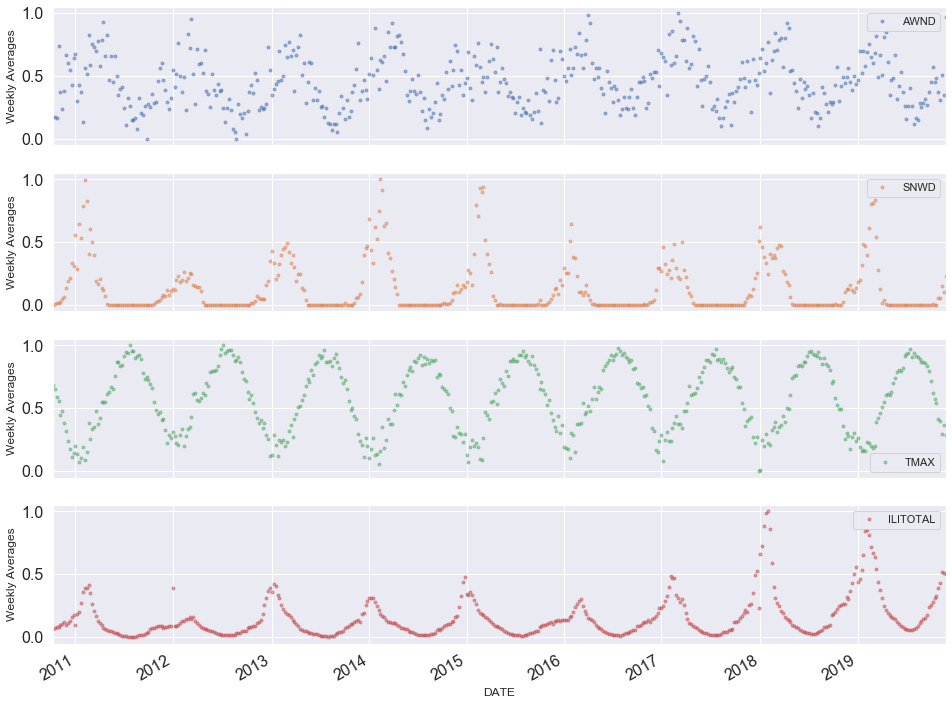

In [115]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
cols_plot = ['AWND', 'SNWD', 'TMAX', 'ILITOTAL'] # 'SNOW', 'PRCP', 
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 13), subplots=True)
for ax in axes:
    ax.set_ylabel('Weekly Averages')
plt.savefig('norm-Average-plot.png')

# Population

In [116]:
# initialize population dataframe us (https://www.worldometers.info/world-population/us-population/)
data = [['2015',320878310 ], ['2016', 323015995], ['2017', 325084756], ['2018', 327096265], ['2019', 329064917]] 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E70B00E888>],
      dtype=object)

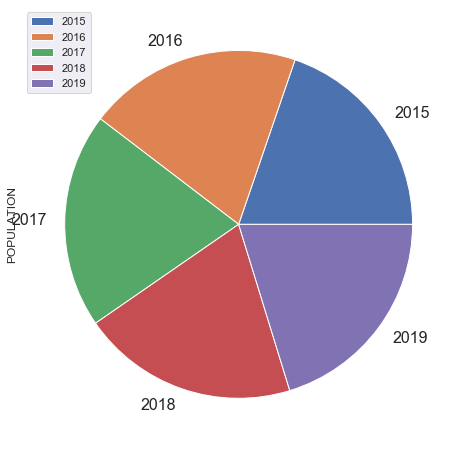

In [117]:
# Create the pandas DataFrame 
pop_us = pd.DataFrame(data, columns = ['YEAR', 'POPULATION']) 
pop_us = pop_us.set_index('YEAR')
pop_us.plot(kind='pie', figsize=(15, 8), subplots=True) 

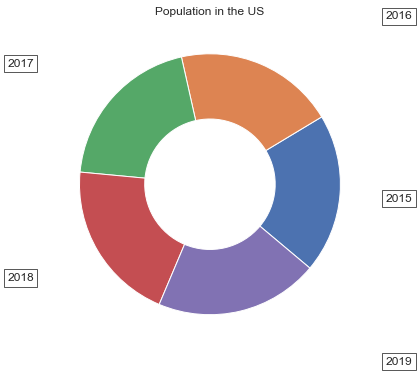

In [118]:
fig, ax = plt.subplots(figsize=(16, 6), subplot_kw=dict(aspect="equal"))

recipe = ["2015",
          "2016",
          "2017",
          "2018",
          "2019"]

data = [320878310, 323015995, 325084756, 327096265, 329064917]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Population in the US")
plt.show()

# PCA -  Principal Component Analysis - not relevant

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

# TESTs

Paired t-test (a.k.a. dependent or correlated t-test). This type of t-test is to compare the samples of the same population (e.g. scores of different tests of students in the same class). scipy provides the ttest_re method to conduct paired t-test
Both types of t-tests return a number which is called the p-value. 

If p-value is below 0.05, we can confidently declare the null-hypothesis is rejected and the difference is significant. If p-value is between 0.05 and 0.1, we may also declare the null-hypothesis is rejected but we are not highly confident. If p-value is above 0.1 we do not reject the null-hypothesis.

In [119]:
def t_test_years(s1, s2, columns=['ILITOTAL']):
    """Test means of a feature set of two samples
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of interests to test
    
    Returns:
        dict: a dictionary of t-test scores for each interest category where the interest category name is the key and the p-value is the value
    """
    results = {i:(stats.ttest_ind(s1[i],s2[i])[1]) for i in columns}    
    return results

Hypothesis 

H0: There is no difference between years and the number of infected people.

H1: There is a difference between the years.

In [120]:
# group in 2017 and 2019
y2019 = average_us.loc[average_us['YEAR'] == 2019]
y2017 = average_us.loc[average_us['YEAR'] == 2017]

In [121]:
# t-test with t-test function
t_test_years(y2019,y2017)

{'ILITOTAL': 0.000615791211814022}

Result:
P-value is below 0.05 -> null-hypothesis can be rejected - there is a significant difference between these years

In [122]:
# group in 2018 and 2019
y2019 = average_us.loc[average_us['YEAR'] == 2019]
y2018 = average_us.loc[average_us['YEAR'] == 2018]

In [123]:
# t-test with t-test function
t_test_years(y2019,y2018)

{'ILITOTAL': 0.2803382244606727}

Result:
P-value is below 0.05 -> null-hypothesis can be rejected - there is a significant difference between these years